<h1>MNIST DATASET </h1>

<img src="mnist.jpg" alt="Image" width="600" height="400">

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings                      
warnings.simplefilter("ignore")  # ignores the warning

# Load Dataset

In [2]:
# def load_mnist_data(data_dir):
#     images = []
#     labels = []

#     for root, dirs, files in os.walk(data_dir):
#         for file in files:
#             if file.endswith('.jpg') or file.endswith('.png'):
#                 # Read the image
#                 image_path = os.path.join(root, file)
#                 image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#                 # Resize image to fit MNIST size (28x28)
#                 image = cv2.resize(image, (28, 28))

#                 # Flatten image and append to images list
#                 images.append(image.flatten())
                
#                 # Extract label from the root folder name
#                 label = int(os.path.basename(root))
#                 labels.append(label)

#     return np.array(images), np.array(labels)

In [3]:
# data_dir = "data/trainingset"
# images, labels = load_mnist_data(data_dir)

# Save in .npy file. So loading is easier.

In [4]:
# np.save('data/mnist_data.npy', {'images': images, 'labels': labels})

# Load .npy file

In [2]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

In [3]:
images[0].shape

(784,)

array([[  3,   0,   0,   3,   7,   3,   0,   3,   0,  11,   0,   0,   3,
          0,   0,   3,   8,   0,   0,   3,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   5,   0,  12,   0,  16,
          0,   0,   4,   0,   2,   8,   3,   0,   4,   8,   0,   0,   0,
          0,   0],
       [  0,   0,   2,   0,   0,   0,   1,   2,   1,  12,   0,   8,   0,
          0,   6,   0,  11,   0,   0,   6,   7,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   3,   0,   0,   2,   3,   0,   0,   0,  12,   0,   0,
         23,   0,   0,   0,   0,  11,   3,   0,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   1,   1,   0,   0,   2,   0,   0,   6,   0,  25,  27, 136,
        135, 188,  89,  84,  25,   0,   0,   3,   1,   0,   0,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0,   3,  88, 247, 236, 255,
        249, 250, 227, 240, 136,  37,   1,   0,   2,   2,   0,   0,   0,
          0,   0],
       [  

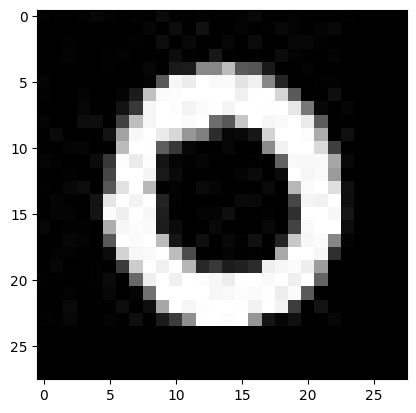

In [4]:
plt.imshow(images[0].reshape(28,28), cmap='gray')
images[0].reshape(28,28)

In [5]:
images[0].reshape(28,28)
print(images[0].reshape(28,28))
print("AFTER FLATENING")
print(images[0].reshape(28,28).flatten())

[[  3   0   0   3   7   3   0   3   0  11   0   0   3   0   0   3   8   0
    0   3   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   1   5   0  12   0  16   0   0   4   0   2
    8   3   0   4   8   0   0   0   0   0]
 [  0   0   2   0   0   0   1   2   1  12   0   8   0   0   6   0  11   0
    0   6   7   2   0   0   0   0   0   0]
 [  0   1   3   0   0   2   3   0   0   0  12   0   0  23   0   0   0   0
   11   3   0   0   4   0   0   0   0   0]
 [  0   1   1   0   0   2   0   0   6   0  25  27 136 135 188  89  84  25
    0   0   3   1   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   3  88 247 236 255 249 250 227 240 136
   37   1   0   2   2   0   0   0   0   0]
 [  2   0   0   3   0   0   4  27 193 251 253 255 255 255 255 240 254 255
  213  89   0   0  14   1   0   0   0   0]
 [  0   0   0   6   0   0  18  56 246 255 253 243 251 255 245 255 255 254
  255 231 119   7   0   5   0   0   0   0]
 [  4   0   0  12  13   0  65 190 246 255 255 251 255 109  88 19

5


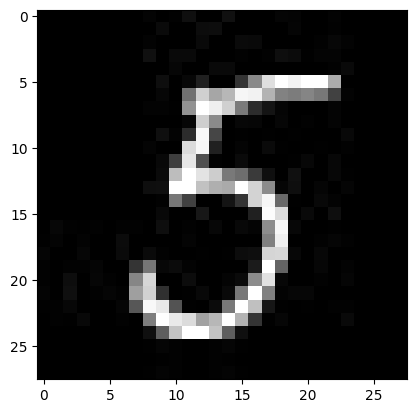

In [6]:
index = 22222
plt.imshow(images[index].reshape(28,28), cmap='gray')
print(labels[index])

# Visualize

In [7]:
import random

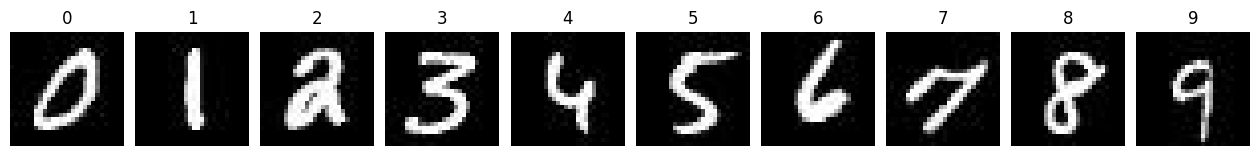

In [8]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Train Test Split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.3, random_state=11)

In [10]:
print("X_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)


X_train shape :  (29400, 784)
y_train shape :  (29400,)
X_test shape :  (12600, 784)
y_test shape :  (12600,)


# Train SVM model

In [11]:
svc = SVC()

In [12]:
svc.fit(x_train, y_train)

SVC()

# Predict on Test data

In [13]:
import pickle
os.makedirs("./model",exist_ok=True)


In [14]:
with open('model/svm_mnist.pkl', 'wb') as f:
    svc = pickle.dump(svc,f)

In [15]:
with open('model/svm_mnist.pkl', 'rb') as f:
    svc = pickle.load(f)

In [16]:
svc

SVC()

In [17]:
y_pred = svc.predict(x_test)

<h2>Model Evaluation</h2>

In [18]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [19]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.9742063492063492
Recall-Score : 0.9741217616597291
Precision-Score : 0.9739788927589379
F1-Score : 0.9740419077320113


In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1289
           1       0.99      0.98      0.99      1373
           2       0.97      0.97      0.97      1239
           3       0.97      0.97      0.97      1317
           4       0.97      0.97      0.97      1243
           5       0.97      0.98      0.98      1162
           6       0.99      0.98      0.98      1227
           7       0.98      0.97      0.98      1350
           8       0.97      0.97      0.97      1166
           9       0.96      0.95      0.96      1234

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



# Confusion Matrix

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

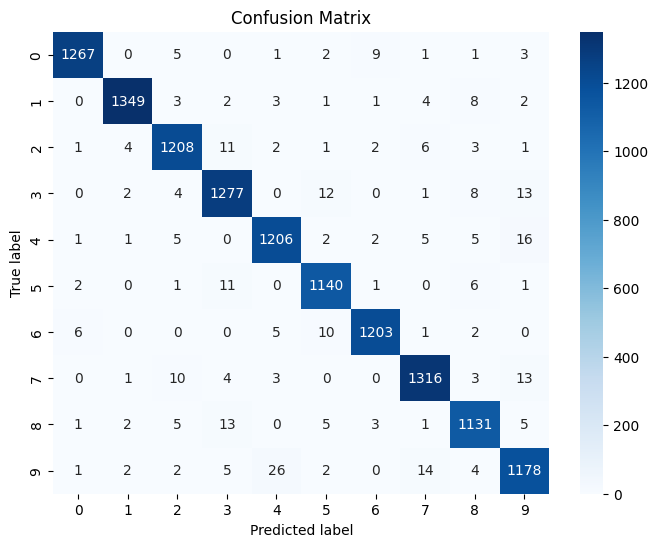

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Inference our model

array([2])

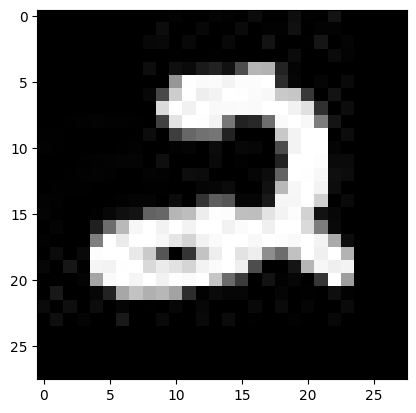

In [23]:
img = cv2.imread("data/test/img_1.jpg")
img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

img_array = img.flatten().reshape(1,-1)
svc.predict(img_array)

<h1>Cross-Validation for Classification Models</h1>

* It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem

* It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds

* This process is repeated multiple times, each time using a different fold as the validation set.

* Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance.

* helps to ensure that the model selected for deployment is robust and generalizes well to new data.

<h2>Purpose of cross-validation</h2>

* The main purpose of cross validation is to prevent overfitting <br>
 
<b>Note:</b> overfitting occurs when a model is trained too well on the training data and performs poorly on new, unseen data

<h2> Types of Cross-Validation</h2>

1. k-fold cross validation
2. leave-one-out cross validation
3. Holdout validation
4. Stratified Cross-Validation

<h4>K-Fold Cross Validation </h4>

* The dataset is divided into K equally sized "folds" or subsets.
* The model is trained and evaluated K times
* In each iteration, one of the K folds is used as the test set, while the remaining K-1 folds are used as the training set.
* Performance metrics (e.g., accuracy, error) are calculated for each iteration.
* The K performance metrics are typically averaged to obtain a more reliable estimate of the model's performance.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*L90fdYb2oT0BOP2CCMSIbg.png" alt="Flowers in Iris Dataset" />


<h4>Holdout Validation </h4>

* we perform training on the 50% of the given dataset and rest 50% is used for the testing purpose
  
* The drawback of the method is that when we split the dataset into 50% for training, we may miss out on valuable information present in the remaining 50%, leading to a higher bias in our model.
  


<h4> Leave One Out Cross Validation (LOOCV) </h4>

* we perform training on the whole dataset but leaves only one data-point of the available dataset and then iterates for each data-point

* An advantage of using this method is that we make use of all data points and hence it is low bias.

* The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point.

* If the data point is an outlier it can lead to higher variation.

* Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.

<h4> Stratified Cross-Validation </h4>

* In many classification tasks, the number of samples in each class may be imbalanced. For example, one class may have significantly fewer samples than others
  
* it preserves the relative proportions of different classes in both the training and testing subsets of each fold

* is particularly useful when dealing with imbalanced datasets because it prevents a situation where a fold contains very few or no samples of a minority class.
  

<h2>Cross Validation in our model</h2>

In [24]:
# from sklearn.model_selection import cross_val_score

# # Perform 5-fold cross-validation and calculate accuracy
# cv_scores = cross_val_score(svc, x_train, y_train, cv=10)

# # Print cross-validation scores
# # print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))
# print("standard deviation in accuracy is:", np.std(cv_scores))

<h2>Hyperparameter Tuning with Grid Search</h2>

* A model <b>hyperparameter</b> is a characteristic of a model that is external to the model and whose value cannot be estimated from data

* The value of the hyperparameter has to be set before the learning process begins

* For example, c in Support Vector Machines, k in k-Nearest Neighbors, the number of hidden layers in Neural Networks.

* a <b>parameter</b> is an internal characteristic of the model and its value can be estimated from data.

* Example, beta coefficients of linear/logistic regression or support vectors in Support Vector Machines.

<b>NOTE :</b>  <b>Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions. </b>

<h2>Working Mechanisms </h2>

* It tries out different values (all possible combination) and then picks the value that gives the best score


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [26]:

model = RandomForestClassifier()

param_grid = {
        'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10,12]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, verbose=2)
grid_search.fit(x_train, y_train) 

# Get the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   5.3s
[CV] END ........................criterion=gini, max_depth=2; total time=   5.9s
[CV] END ........................criterion=gini, max_depth=4; total time=  11.1s
[CV] END ........................criterion=gini, max_depth=4; total time=  12.2s
[CV] END ........................criterion=gini, max_depth=6; total time=  23.5s
[CV] END ........................criterion=gini, max_depth=6; total time=  20.1s
[CV] END ........................criterion=gini, max_depth=8; total time=  38.5s
[CV] END ........................criterion=gini, max_depth=8; total time=  26.1s
[CV] END .......................criterion=gini, max_depth=10; total time=  37.9s
[CV] END .......................criterion=gini, max_depth=10; total time=  39.2s
[CV] END .......................criterion=gini, max_depth=12; total time=  55.0s
[CV] END .......................criterion=gini, 

KeyboardInterrupt: 

In [27]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=12)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12)

# Assignments
<li> Evaluate RFC </li>
<li> Deploy RFC model with Flask </li>

In [29]:
import pickle
with open('model/best_rfc_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Next Step

![svm vs ann.png](<attachment:svm vs ann.png>)
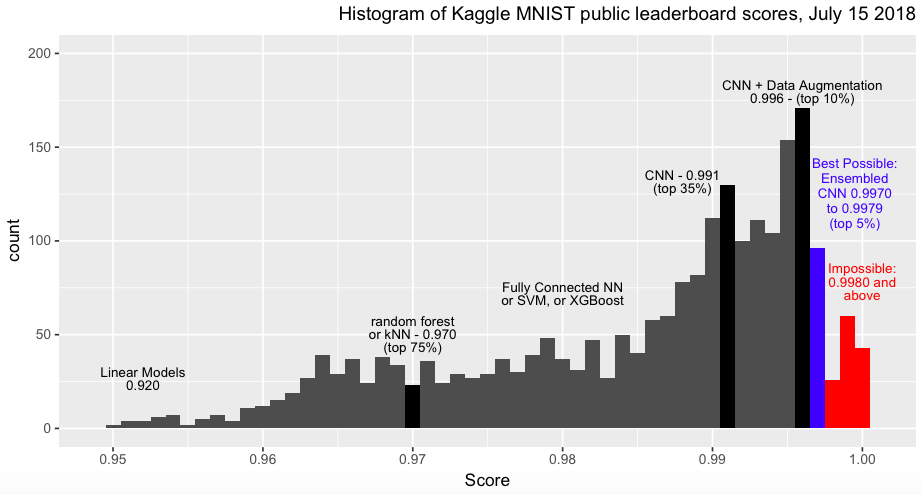